In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('netflix1.csv')

# 1. Treating the Nulls (Nulls were represented as 'Not Given' in the dataset)

#  Replacing 'Not Given' with 'Unknown' for better clarity in analysis.
df['director'] = df['director'].replace('Not Given', 'Unknown')
df['country'] = df['country'].replace('Not Given', 'Unknown')


# 2. Treating the duplicates
# Checking and removing duplicates. (No duplicates were found in this dataset.)
df.drop_duplicates(inplace=True)

# 3. Populating missing rows
# Missing values were handled by replacing 'Not Given' with 'Unknown'.

# 4. Droping unneeded columns
#  Droping 'show_id' as it is an identifier not typically used for visualization.
df.drop('show_id', axis=1, inplace=True)

# 5. Spliting columns
#  Splitting 'duration' into a numerical value and its unit (min or Season).
df[['duration_value', 'duration_unit']] = df['duration'].str.split(' ', expand=True)
df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')
df.drop('duration', axis=1, inplace=True)

#  Splitting 'listed_in' (genres) into a list for easier analysis/explosion.
df['genre_list'] = df['listed_in'].str.split(', ')
df.drop('listed_in', axis=1, inplace=True)

#  Saving the cleaned dataset to a new CSV file
cleaned_file_name = 'netflix_cleaned.csv'
df.to_csv(cleaned_file_name, index=False)

In [11]:
# 1 Comparision between Movie Counts and TV Show Counts: Count of Movies vs. TV Shows 
type_counts = df['type'].value_counts()
print(" 1. Content Distribution:")
print(type_counts)
print("\n" + "-"*30 + "\n")

# Calculating Average Movie Duration 
# Filter for movies only
movies = df[df['type'] == 'Movie']
avg_duration = movies['duration_value'].mean()
print(f"2. Average Movie Duration: {avg_duration:.2f} minutes")
print("\n" + "-"*30 + "\n")

# Top 5 Producing Countries
top_countries = df['country'].value_counts().head(5)
print("3. Top 5 Producing Countries:")
print(top_countries)





 1. Content Distribution:
type
Movie      6126
TV Show    2664
Name: count, dtype: int64

------------------------------

2. Average Movie Duration: 99.58 minutes

------------------------------

3. Top 5 Producing Countries:
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Unknown            287
Name: count, dtype: int64


In [ ]:
# 4. Top 5 Ratings 
top_ratings = df['rating'].value_counts().head(5)
print("4. Top 5 Ratings:")
print(top_ratings)
print("\n" + "-"*30 + "\n")

# 5. Top 5 Genres
# The genres are stored as strings like "['Drama', 'Comedy']", so we parse them first
try:
    # Convert string representation of list to actual python list
    df['genre_list_parsed'] = df['genre_list'].apply(ast.literal_eval)
    
    # 'Explode' the lists so each genre gets its own row, then count
    all_genres = df.explode('genre_list_parsed')['genre_list_parsed']
    top_genres = all_genres.value_counts().head(5)
    
    print("5. Top 5 Genres:")
    print(top_genres)
except Exception as e:
    print(f"Could not calculate genres: {e}")



4. Top 5 Ratings:
rating
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
Name: count, dtype: int64

------------------------------

5. Top 5 Genres:
genre_list_parsed
International Movies      2752
Dramas                    2426
Comedies                  1674
International TV Shows    1349
Documentaries              869
Name: count, dtype: int64


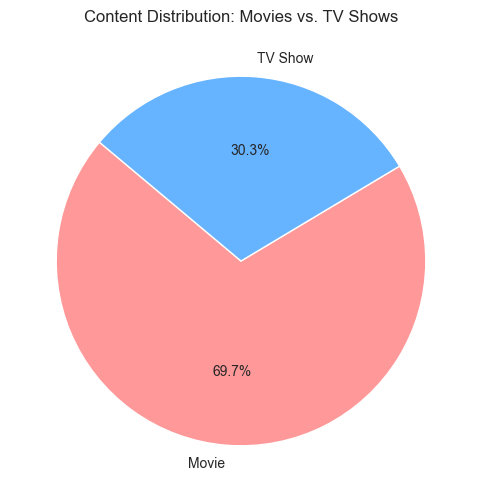

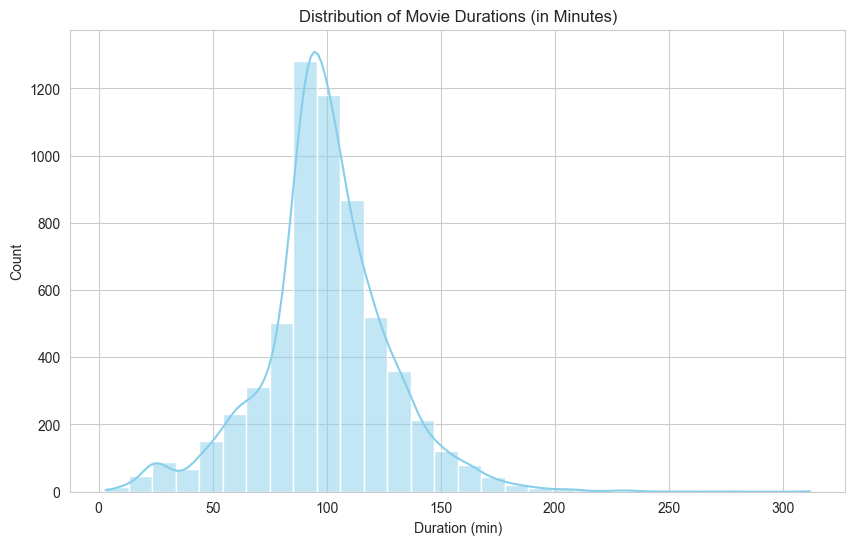

C:\Users\User\AppData\Local\Temp\ipykernel_552\3482575847.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


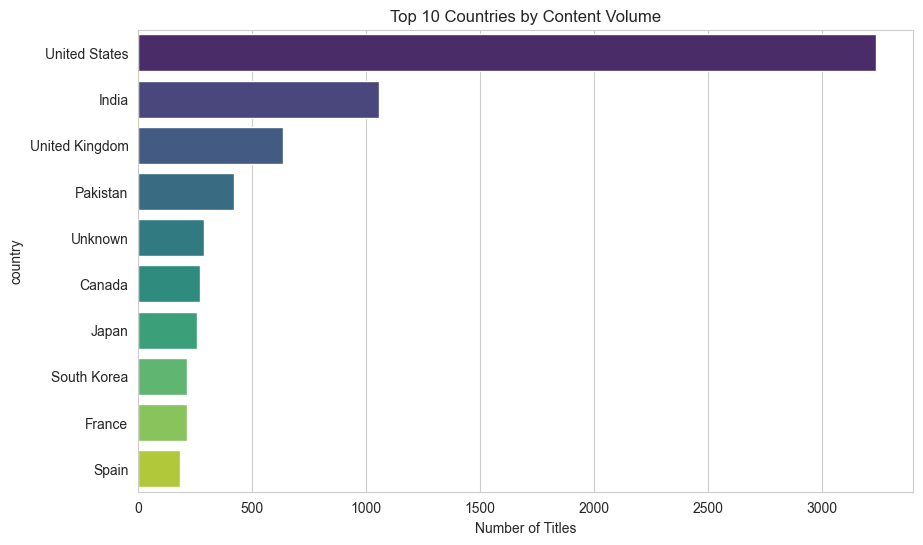

C:\Users\User\AppData\Local\Temp\ipykernel_552\3482575847.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='magma')


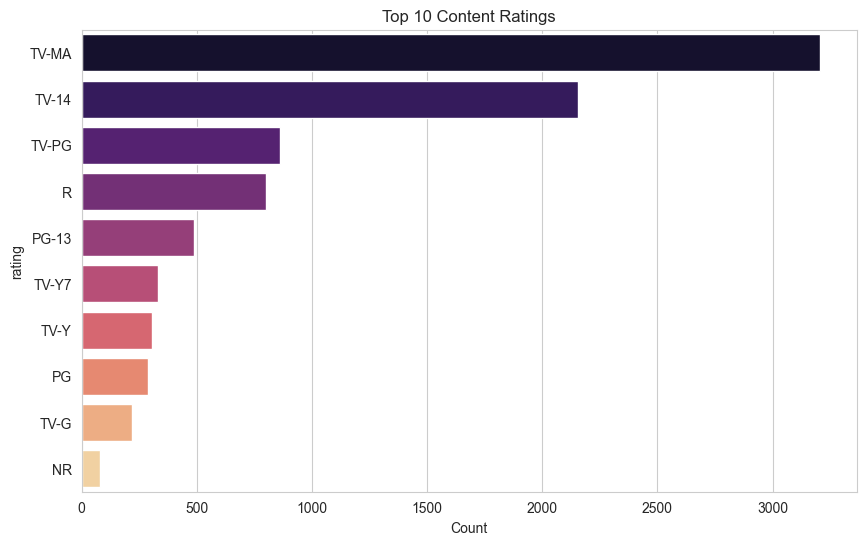

C:\Users\User\AppData\Local\Temp\ipykernel_552\3482575847.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


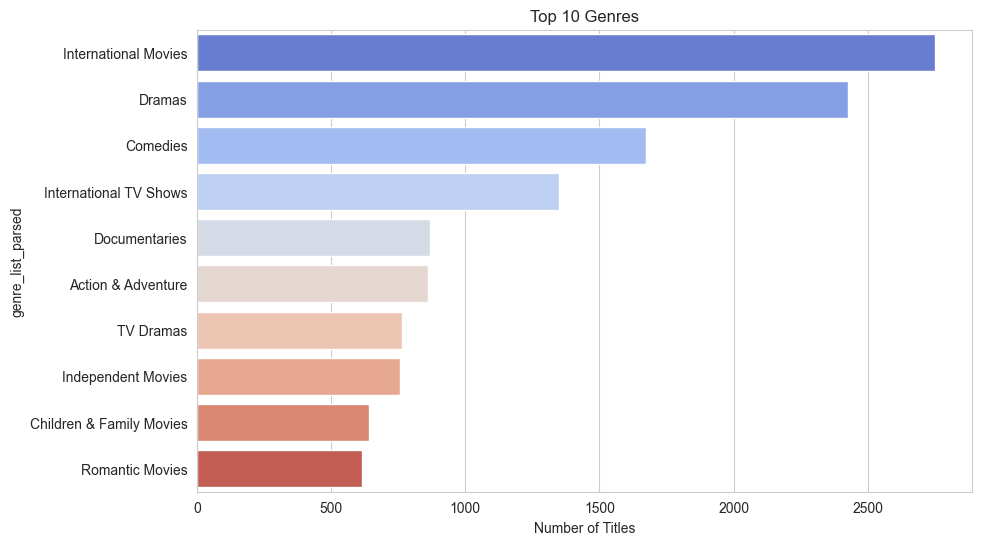

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

#  Loading Data
df = pd.read_csv('netflix_cleaned.csv')

# Setting visual style
sns.set_style("whitegrid")

# Plot 1: Movies vs Tv Shows Counts(Pie Chart)
plt.figure(figsize=(8, 6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Content Distribution: Movies vs. TV Shows')
plt.show()

# Plot 2: Movie Duration Distribution (Histogram) ---
plt.figure(figsize=(10, 6))
movie_duration = df[df['type'] == 'Movie']['duration_value']
sns.histplot(movie_duration, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations (in Minutes)')
plt.xlabel('Duration (min)')
plt.show()

# Plot 3: Top 10 Countries (Horizontal Bar Chart) ---
plt.figure(figsize=(10, 6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Content Volume')
plt.xlabel('Number of Titles')
plt.show()

# Plot 4: Top 10 Ratings (Bar Chart) ---
plt.figure(figsize=(10, 6))
top_ratings = df['rating'].value_counts().head(10)
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='magma')
plt.title('Top 10 Content Ratings')
plt.xlabel('Count')
plt.show()


# Plot 5: Top 10 Genres
try:
    # Parse the stringified lists into actual lists
    df['genre_list_parsed'] = df['genre_list'].apply(ast.literal_eval)
    
    # Explode the lists to count individual genres
    all_genres = df.explode('genre_list_parsed')['genre_list_parsed']
    top_genres = all_genres.value_counts().head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
    plt.title('Top 10 Genres')
    plt.xlabel('Number of Titles')
    plt.show()
except Exception as e:
    print(f"Could not plot genres: {e}")
    